<a href="https://colab.research.google.com/github/Dedeepyamaddi/Data-Analytics/blob/main/EDA_on_Retail_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load data
df = pd.read_csv("/content/retail_sales_dataset.csv")

# Inspect structure
print(df.info())
print(df.head())

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check for nulls
print(df.isnull().sum())

# Drop missing values if needed
df.dropna(inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21    

In [ ]:
# Columns to analyze
cols = ['Quantity', 'Price per Unit', 'Total Amount']

for col in cols:
    print(f"\n📊 {col} Statistics:")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Mode: {df[col].mode().iloc[0]}")
    print(f"Standard Deviation: {df[col].std():.2f}")



📊 Quantity Statistics:
Mean: 2.51
Median: 3.00
Mode: 4
Standard Deviation: 1.13

📊 Price per Unit Statistics:
Mean: 179.89
Median: 50.00
Mode: 50
Standard Deviation: 189.68

📊 Total Amount Statistics:
Mean: 456.00
Median: 135.00
Mode: 50
Standard Deviation: 560.00


<ipython-input-5-ba8c4385d813>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Total Amount'].resample('M').sum()
<ipython-input-5-ba8c4385d813>:14: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


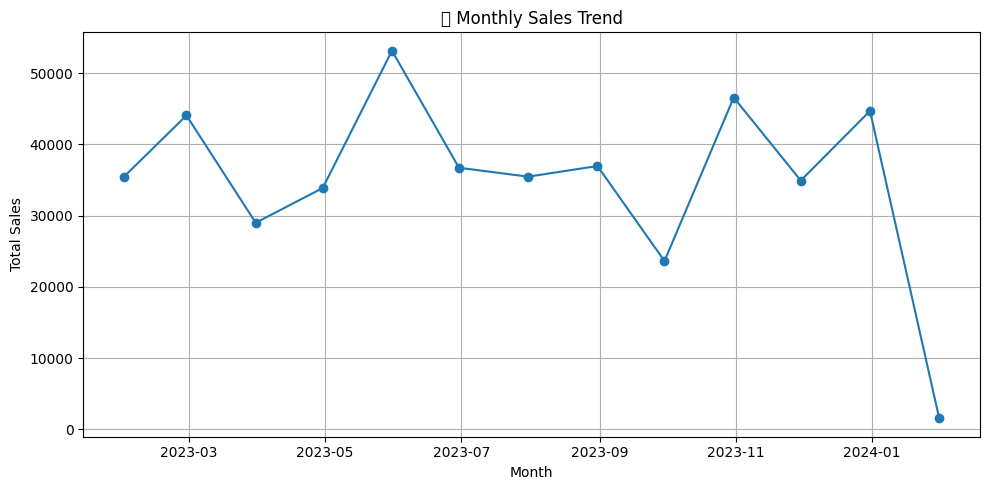

In [ ]:
# Set Date as index (if not already)
df.set_index('Date', inplace=True)

# Resample to monthly sales
monthly_sales = df['Total Amount'].resample('M').sum()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales, marker='o')
plt.title('🕒 Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


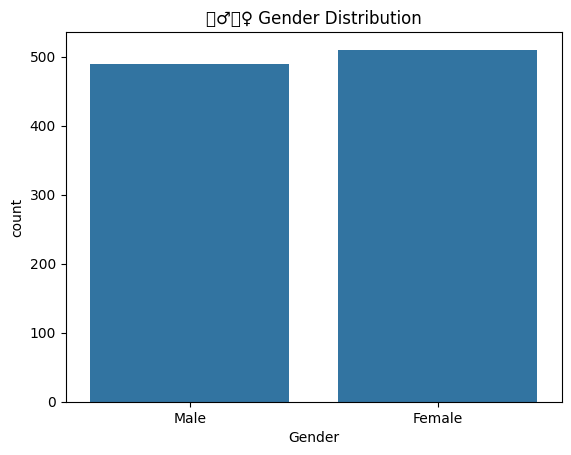

In [ ]:
sns.countplot(data=df, x='Gender')
plt.title('🧍‍♂️🧍‍♀️ Gender Distribution')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


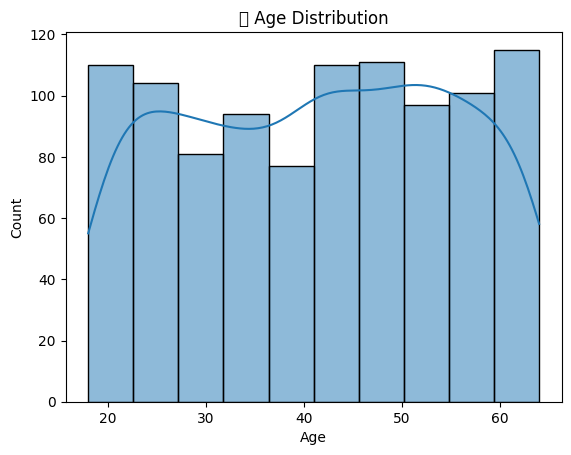

In [ ]:
sns.histplot(data=df, x='Age', bins=10, kde=True)
plt.title('📈 Age Distribution')
plt.show()


<ipython-input-9-e52f5c978c81>:8: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


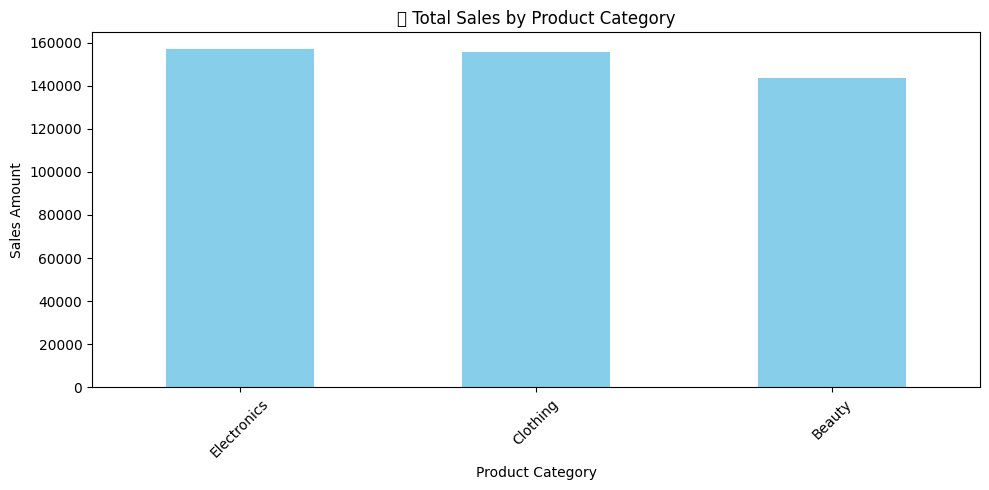

In [ ]:
top_categories = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

top_categories.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('🏷️ Total Sales by Product Category')
plt.ylabel('Sales Amount')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


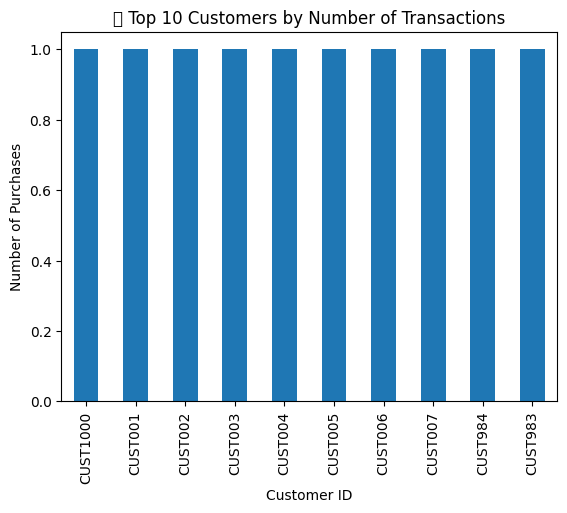

In [ ]:
customer_freq = df['Customer ID'].value_counts().head(10)

customer_freq.plot(kind='bar')
plt.title('👥 Top 10 Customers by Number of Transactions')
plt.xlabel('Customer ID')
plt.ylabel('Number of Purchases')
plt.show()


<ipython-input-11-c3fa3f4fe869>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
<ipython-input-11-c3fa3f4fe869>:14: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


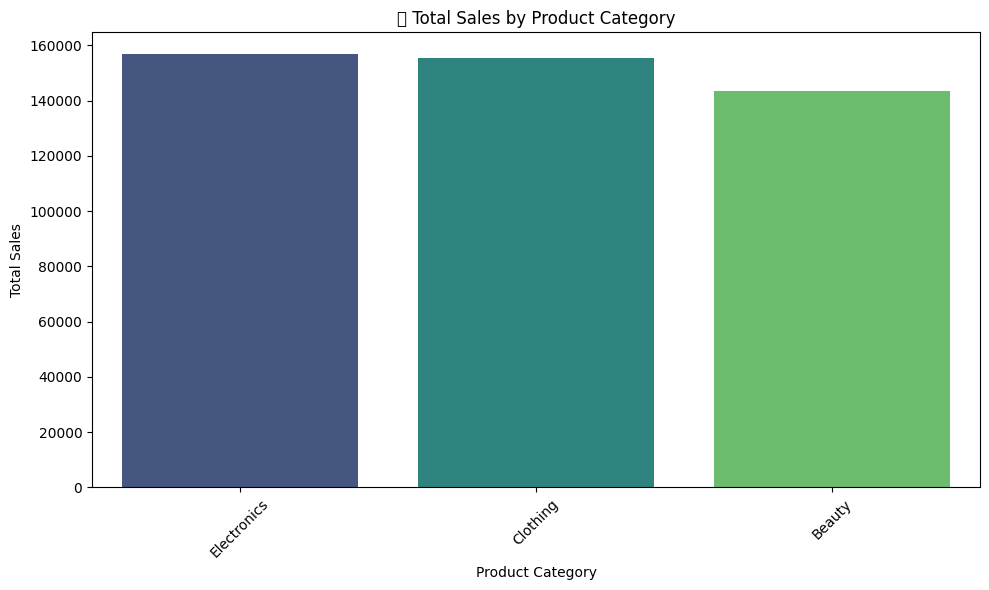

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by Product Category and sum Total Amount
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.title('🛍️ Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-13-c6612ed8fb54>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Total Amount'].resample('M').sum()
<ipython-input-13-c6612ed8fb54>:16: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


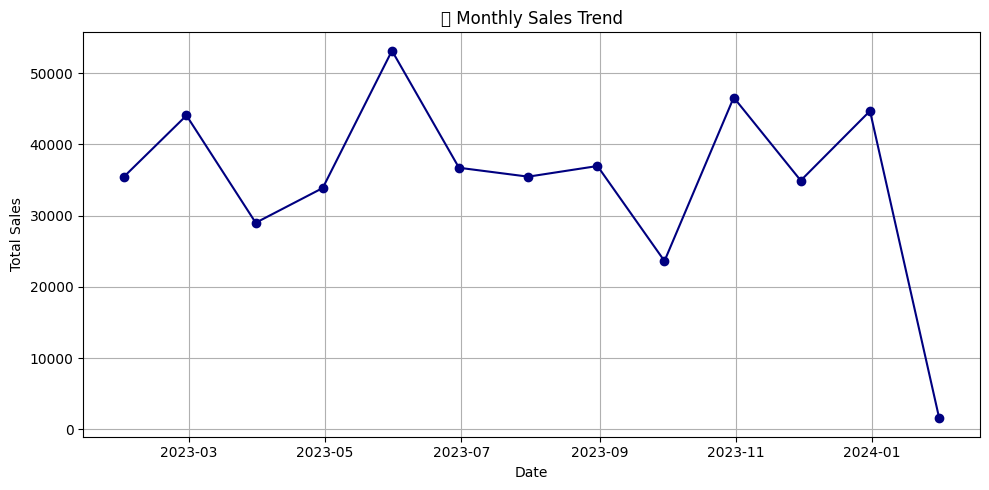

In [ ]:
# Ensure 'Date' is datetime
# df['Date'] = pd.to_datetime(df['Date']) # This line is not needed because 'Date' is already the datetime index

# Resample monthly
# monthly_sales = df.resample('M', on='Date')['Total Amount'].sum() # The 'on' parameter is not needed when resampling on the index
monthly_sales = df['Total Amount'].resample('M').sum()

# Line plot
plt.figure(figsize=(10, 5))
# Plot using the monthly_sales index and values
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='navy')
plt.title('📅 Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-14-e52b461d82b1>:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


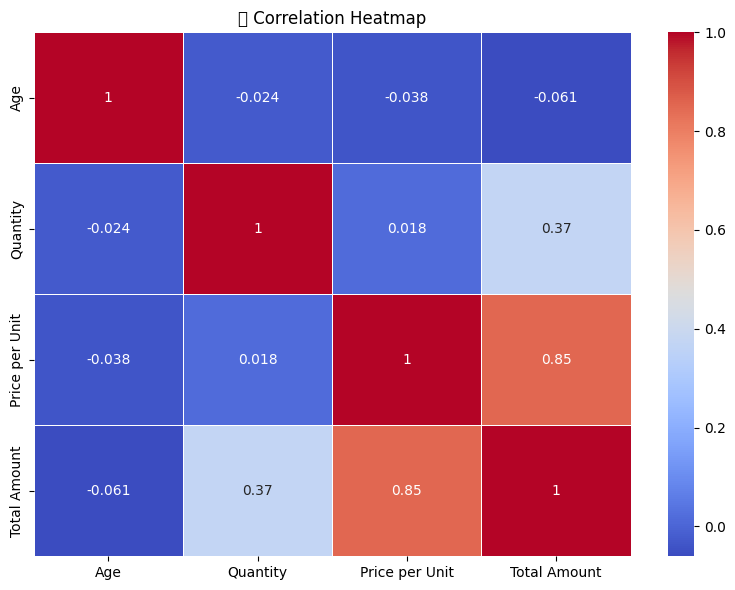

In [ ]:
# Compute correlation matrix
corr = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('📊 Correlation Heatmap')
plt.tight_layout()
plt.show()
